# Logical State Preparation

Example notebook for logical state preparation task.

In [1]:
import sys
sys.path.append(r'../')

%load_ext autoreload
%autoreload 2
%matplotlib inline

## 01 - Simplest Example

In the simplest example, you only need to specify the target stabilizers of your logical state.

By default, [CX, S, H] gate set and all-to-all qubit connectivity will be used.

In [2]:
from rlftqc.logical_state_preparation import LogicalStatePreparation

## Define the target stabilizers
## For example, zero logical of 7 qubit Steane code.
target = ["+ZZZZZZZ",
        "+ZIZIZIZ",
        "+XIXIXIX",
        "+IZZIIZZ",
        "+IXXIIXX",
        "+IIIZZZZ",
        "+IIIXXXX",
        ]

## Create class
lsp = LogicalStatePreparation(target)


/opt/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "


We now train the agent. It takes around 100 seconds to train. 

In [3]:
## Train the agent
lsp.train()

==== Training begin


/opt/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "


==== Training finished, time elapsed: 165.13998 s


After the training is done, we can now the run the agent to get the circuit.

/opt/anaconda3/envs/jax/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Circuit 0


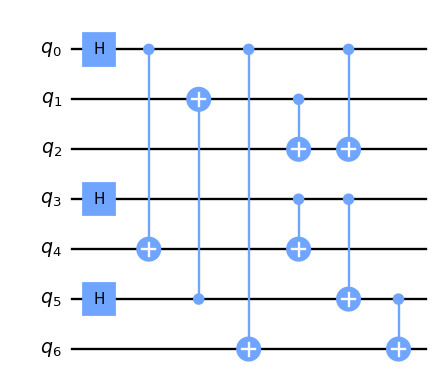

==== Circuits saved in folder:  results-lsp/7/


In [4]:
lsp.run()

We can also customize the folder name to save the circuit.

In [ ]:
lsp.run(results_folder_name='results')

We can also log the result to check the training convergence.

In [ ]:
## Log the result if needed
lsp.log()

We can also customize the folder name to log the experiment.

In [ ]:
## One can also customize the folder name to save log
lsp.log(results_folder_name='logs')

## 02 - Different Gate Set and Qubit Connectivity
### Specify Manually


In this part, we specify a different gate set and qubit connectivity.
We try with IBM native gate set: [CX, S, SQRT_X, and X] and next-nearest neighbors qubit connectivity.

In [ ]:
from rlftqc.logical_state_preparation import LogicalStatePreparation
from rlftqc.simulators.clifford_gates import CliffordGates

## Define the target stabilizers
## For example, zero logical of 5 qubit perfect code.
target = [
        "+ZZZZZ",
        "+IXZZX",
        "+XZZXI",
        "+ZZXIX",
        "+ZXIXZ"]

## Specify gates
cliff_gates = CliffordGates(5)
gates = [cliff_gates.s, cliff_gates.cx, cliff_gates.sqrt_x, cliff_gates.x]

## Create next-nearest neighbors connectivity graph
graph = []
for ii in range(4):
    graph.append((ii, ii+1))
    graph.append((ii+1, ii))
print(graph)
    
## Create class
lsp = LogicalStatePreparation(target, gates=gates, graph=graph)

We now train the agent. It takes around 60 seconds to train. 

In [ ]:
lsp.train()

Run the agent and get the prepared circuit

In [ ]:
lsp.run()

We can also log the result to check the training convergence.

In [ ]:
lsp.log()

### Use the `Devices` class

You can also use the `Devices` class available for IBM, IonTrap, and Sycamore devices.


#### IBM 
Here, for example, we use the IBMQ Jakarta device and visualize the connectivity 

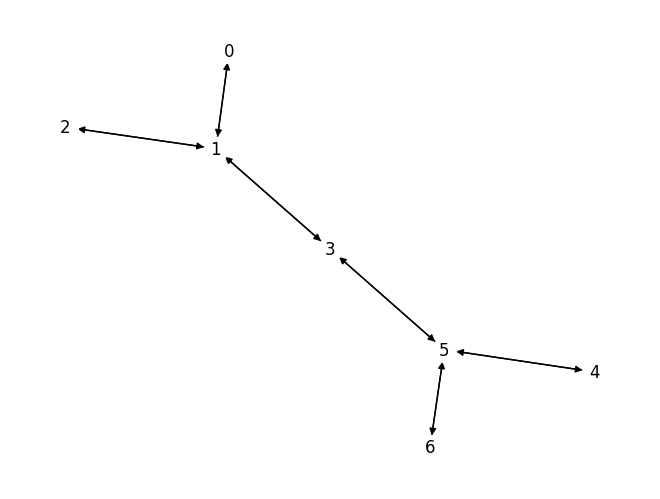

In [36]:
from rlftqc.devices import IBM

device = IBM('jakarta')

device.visualize()

Since we want to synthesize a 5 qubit code, we can take the subset of the device.

Subgraph has been choosen. The node has been relabeled as follows: {0: 0, 1: 1, 2: 2, 3: 3, 5: 4}


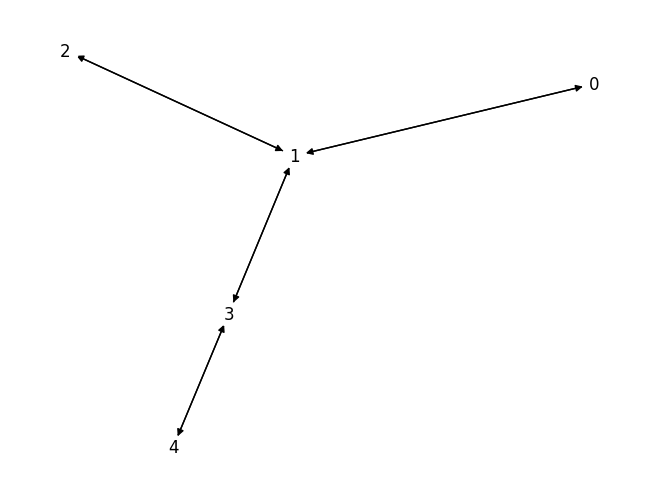

In [37]:
graph = device.get_connectivity([0,1,2,3,5])
device.visualize()

We can then get the gateset for the IBM device.

In [43]:
gates = device.get_gateset()
print([gate.__name__ for gate in gates])

['cx', 'x', 's', 'sqrt_x']


We can now create the object and train the agent.

In [39]:
from rlftqc.logical_state_preparation import LogicalStatePreparation

## Define the target stabilizers
## For example, zero logical of 5 qubit perfect code.
target = [
        "+ZZZZZ",
        "+IXZZX",
        "+XZZXI",
        "+ZZXIX",
        "+ZXIXZ"]

## Create class
lsp = LogicalStatePreparation(target, gates=gates, graph=graph)

In [40]:
lsp.train()

==== Training begin
(10, 10) (10, 10)
==== Training finished, time elapsed: 88.44796 s


Run the agent and get the prepared circuit

/opt/anaconda3/envs/jax/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Circuit 0


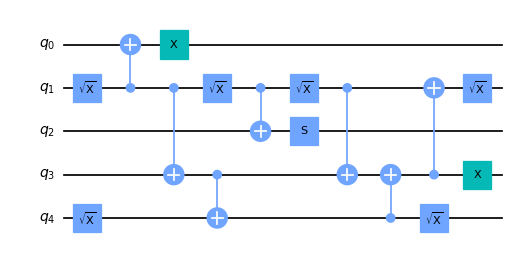

==== Circuits saved in folder:  results-lsp/5/


In [41]:
lsp.run()

We can also log the result to check the training convergence.

==== Logging results in folder:  results-lsp/5/


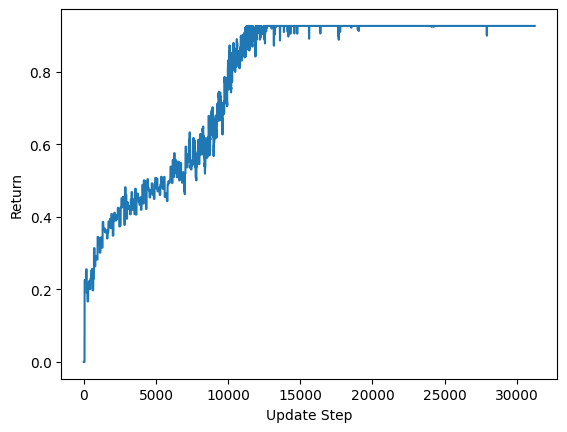

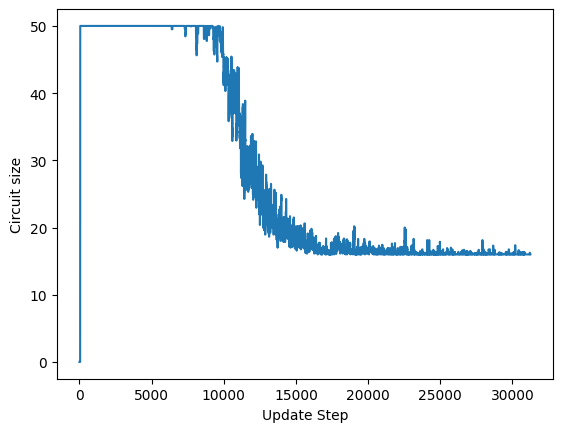

In [42]:
lsp.log()

#### Sycamore 
Here, for example, we use the Sycamore device and visualize the connectivity.

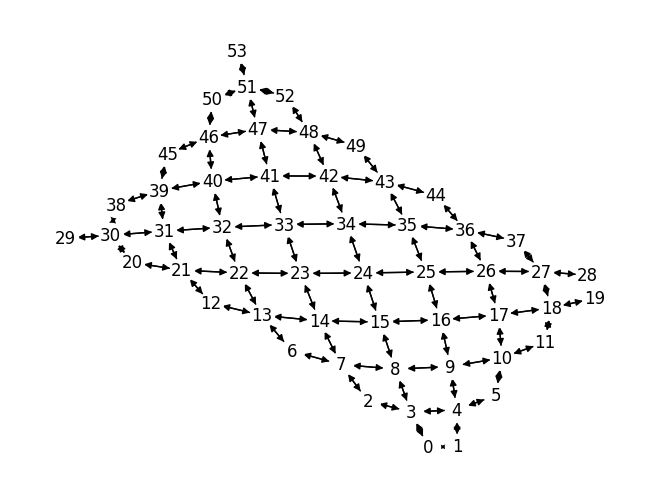

In [47]:
from rlftqc.devices import Sycamore

device = Sycamore()

device.visualize()

Since we want to synthesize a 5 qubit code, we can take the subset of the device. Also, Sycamore has CZ as two-qubit native gate set, which is symmetric. We then can set directed to False so we do not apply the same gate twice.

Subgraph has been choosen. The node has been relabeled as follows: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


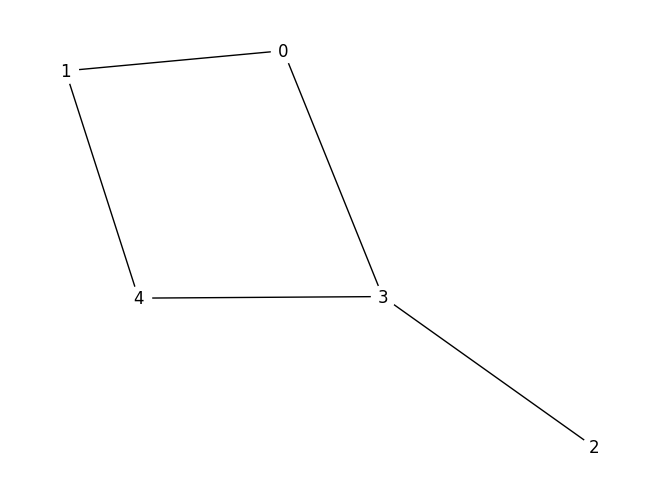

In [51]:
graph = device.get_connectivity([0,1,2,3,4], directed=False)
device.visualize()

In [52]:
gates = device.get_gateset()
print([gate.__name__ for gate in gates])

['cz', 'h', 's']


We can now create the object and train the agent.

In [53]:
from rlftqc.logical_state_preparation import LogicalStatePreparation

## Define the target stabilizers
## For example, zero logical of 5 qubit perfect code.
target = [
        "+ZZZZZ",
        "+IXZZX",
        "+XZZXI",
        "+ZZXIX",
        "+ZXIXZ"]

## Create class
lsp = LogicalStatePreparation(target, gates=gates, graph=graph)

In [54]:
lsp.train()

==== Training begin


/opt/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/ops/scatter.py:94: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn("scatter inputs have incompatible types: cannot safely cast "


==== Training finished, time elapsed: 84.16986 s


Run the agent and get the prepared circuit

/opt/anaconda3/envs/jax/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


Circuit 0


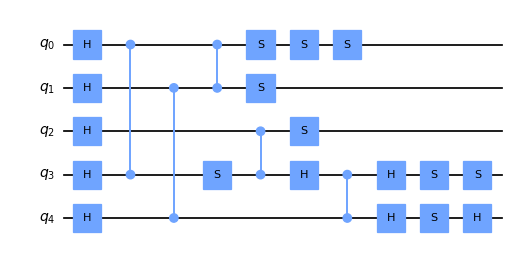

==== Circuits saved in folder:  results-lsp/5/


In [55]:
lsp.run()

We can also log the result to check the training convergence.

==== Logging results in folder:  results-lsp/5/


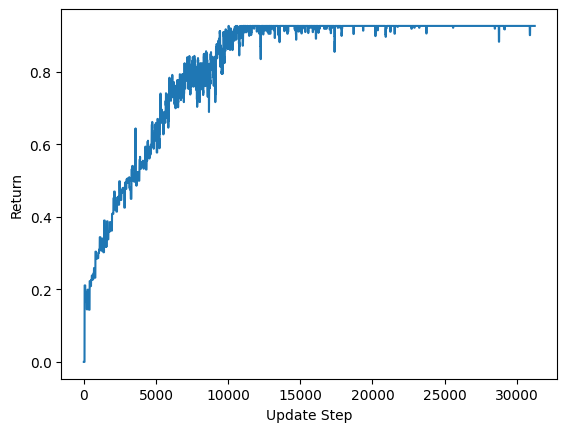

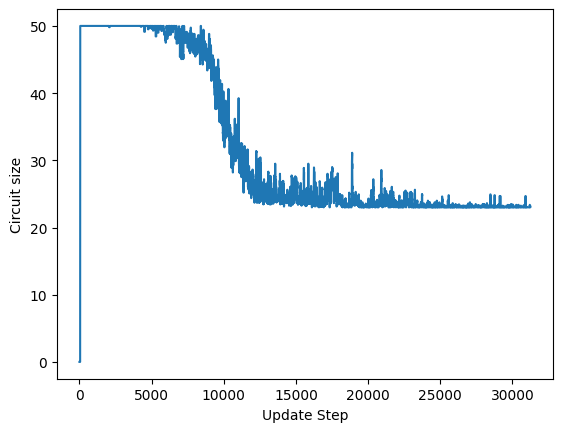

In [56]:
lsp.log()

## 03 - Advanced Example 

This part shows how to customize the training configuration.

In [ ]:
from rlftqc.logical_state_preparation import LogicalStatePreparation

## Define the target stabilizers
## For example, zero logical of 7 qubit Steane code.
target = ["ZZZZZZZ",
        "ZIZIZIZ",
        "XIXIXIX",
        "IZZIIZZ",
        "IXXIIXX",
        "IIIZZZZ",
        "IIIXXXX",
        ]

## Create class
lsp = LogicalStatePreparation(target)


Change the number of possible gates for training with the max_steps.

In [ ]:
lsp = LogicalStatePreparation(target, max_steps = 100)

Change seed for training.

In [ ]:
lsp = LogicalStatePreparation(target, seed = 123)

For more advanced training configurations, we can change the training config.

In [ ]:
lsp.training_config

In [ ]:
# NUM_AGENTS change the number of parallel agents to train (default: 1).
lsp.training_config['NUM_AGENTS'] = 5

# TOTAL_TIMESTEPS change the number of total timesteps for training (default: 5e5), increase this for longer training.
lsp.training_config['TOTAL_TIMESTEPS'] = 1e7
